### Different model sizes, ResNet+ViT image classification

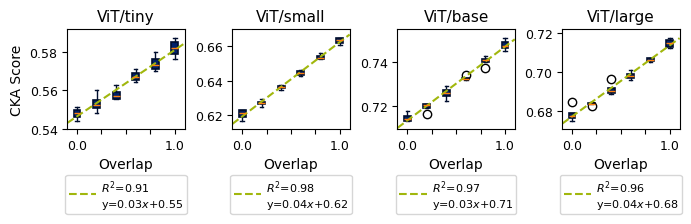

In [1]:
######### plotting for ResNet/ViT, dataset overlap


import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.patches import Patch
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# dataset = "cifar100"
dataset = "tinyimagenet"

# Load data
# df = pd.read_csv(f'./plotting_results/resnet_{dataset}_ds_platonic.csv')

# Define metrics and plot layout
plot_column = 'metric_overlap'

resnet_models = ['resnet18', 'resnet50', 'resnet101', 'resnet152']
vit_models = ['vit_tiny_patch16_224', 'vit_small_patch32_224', 'vit_base_patch32_224', 'vit_large_patch32_224']
model_name = "resnet"
model_name = "vit"

model_to_text = {'resnet18':'ResNet18','resnet50':'ResNet50','resnet101':"ResNet101",'resnet152':'ResNet152',
                 'vit_tiny_patch16_224':'ViT/tiny','vit_small_patch32_224':'ViT/small',
                 'vit_base_patch32_224':'ViT/base','vit_large_patch32_224':'ViT/large'}

model_names = resnet_models if "resnet" in model_name else vit_models

overlap_name = None
if dataset == "cifar10":
    overlap_name = "CIFAR-10"
if dataset == "cifar100":
    overlap_name = "CIFAR-100"
if dataset == "tinyimagenet":
    overlap_name = "TinyImageNet"

metric_to_exp_dict = {
    'metric_overlap': overlap_name,
}
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)



for i, metric in enumerate(unique_metrics):
    
    
    for j, name in enumerate(model_names):
        df = pd.read_csv(f'./plotting_results_iclr2026/different_model_size_ds/ds_platonic_ffcv_{name}_{dataset}.csv')
        
        frac_values = sorted(df['frac_overlap'].unique())
        x_min, x_max = min(frac_values), max(frac_values)
        padding = 0.1 * (x_max - x_min)
        x_min -= padding
        x_max += padding
        
        
        df_metric = df[df['metric'] == metric]
        ax = axes[j] if n_rows == 1 else axes[i, j]
        plot_column = f"metric_{dataset}"
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][plot_column].values for frac in frac_values]
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5), 
        )

        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[plot_column].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(model_to_text[name], fontsize=11)

# Final layout
# fig.tight_layout()

fig.savefig(f"./plotting_final_figures_iclr2026/{model_name}_{dataset}_ds_overlap.pdf", bbox_inches='tight')
plt.show()

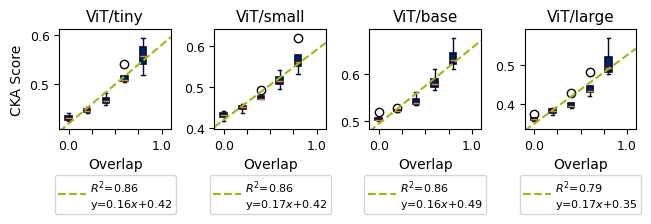

In [31]:
######### plotting for ResNet, task overlap

import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.patches import Patch
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# dataset = "cifar100"
dataset = "tinyimagenet"

# Define metrics and plot layout
plot_column = 'metric_ood_one'

resnet_models = ['resnet18', 'resnet50', 'resnet101', 'resnet152']
vit_models = ['vit_tiny_patch16_224', 'vit_small_patch32_224', 'vit_base_patch32_224', 'vit_large_patch32_224']
model_name = "resnet"
model_name = "vit"

model_to_text = {'resnet18':'ResNet18','resnet50':'ResNet50','resnet101':"ResNet101",'resnet152':'ResNet152',
                 'vit_tiny_patch16_224':'ViT/tiny','vit_small_patch32_224':'ViT/small',
                 'vit_base_patch32_224':'ViT/base','vit_large_patch32_224':'ViT/large'}

model_names = resnet_models if "resnet" in model_name else vit_models

overlap_name = None
if dataset == "cifar10":
    overlap_name = "CIFAR-10"
if dataset == "cifar100":
    overlap_name = "CIFAR-100"
if dataset == "tinyimagenet":
    overlap_name = "TinyImageNet"

metric_to_exp_dict = {
    'metric_ood_one': overlap_name,
}
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.6 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)



for i, metric in enumerate(unique_metrics):
    
    
    for j, name in enumerate(model_names):
        df = pd.read_csv(f'./plotting_results_iclr2026/different_model_size_task/task_platonic_ffcv_{name}_{dataset}.csv')
        
        frac_values = sorted(df['frac_overlap'].unique())
        x_min, x_max = min(frac_values), max(frac_values)
        padding = 0.1 * (x_max - x_min)
        x_min -= padding
        x_max += padding
        
        
        df_metric = df[df['metric'] == metric]
        df_metric = df_metric[df_metric["frac_overlap"] != 1]  # ood

        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][plot_column].values for frac in frac_values]
        
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5), 
        )

        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[plot_column].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(model_to_text[name], fontsize=11)

# Final layout
# fig.tight_layout()

fig.savefig(f"./plotting_final_figures_iclr2026/{model_name}_{dataset}_task_overlap.pdf", bbox_inches='tight')
plt.show()

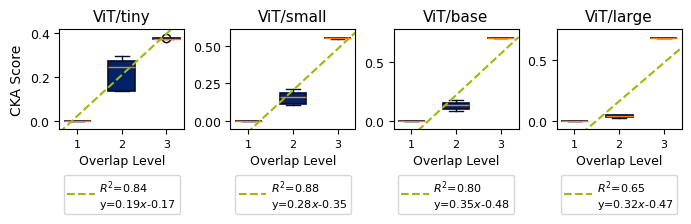

In [23]:
#### resnet/vit ColorShapeDigit

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


resnet_models = ['resnet18', 'resnet50', 'resnet101', 'resnet152']
vit_models = ['vit_tiny_patch16_224', 'vit_small_patch32_224', 'vit_base_patch32_224', 'vit_large_patch32_224']
model_name = "resnet"
model_name = "vit"

model_to_text = {'resnet18':'ResNet18','resnet50':'ResNet50','resnet101':"ResNet101",'resnet152':'ResNet152',
                 'vit_tiny_patch16_224':'ViT/tiny','vit_small_patch32_224':'ViT/small',
                 'vit_base_patch32_224':'ViT/base','vit_large_patch32_224':'ViT/large'}

model_names = resnet_models if "resnet" in model_name else vit_models


# New mapping: all partition2 combinations → "2"
partition_model_to_abbrev = {
    ('partition1', 'shape', 'digit'): "1",
    ('partition2', 'shape_color', 'digit_color'): "2",
    ('partition2', 'shape_digit', 'digit_color'): "2",
    ('partition2', 'shape_digit', 'shape_color'): "2",
    ('partition3', 'all0', 'all1'): "3"
}
x_order = ["1", "2", "3"]

# Metric and value setup
metrics = ['cka']
value_column = 'partition_metric'
ds_to_full_ds_name_map = {'cifar10': "CIFAR-10 (OOD)", 'svhn': "SVHN (OOD)", 'mnist': "MNIST (OOD)", 
                          'partition_metric': 'ColorShapeDigit800k'}
metric_to_full_name = {"cka": "CKA Score"}

# Duke colors
duke_fill = '#012169'
duke_edge = '#000E2F'
duke_mean = '#7BAFD4'

# Subplots
n_rows = len(metrics)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

for row_idx, metric in enumerate(metrics):
    
    for col_idx, name in enumerate(model_names):
        ax = axes[row_idx, col_idx] if n_rows > 1 else axes[col_idx]
        
        df = pd.read_csv(f"./plotting_results_iclr2026/different_model_size_csd/csd_platonic_ffcv_{name}.csv")

        df['x_label'] = df.apply(lambda row: partition_model_to_abbrev.get(
            (row['partition'], row['model0'], row['model1']), 'UNK'), axis=1)
        df = df[df['x_label'].isin(x_order)]
        df['x_label'] = pd.Categorical(df['x_label'], categories=x_order, ordered=True)


        metric_df = df[df['metric'] == metric].copy()
        metric_df = metric_df.sort_values(by='x_label')

        # Group values by x_label (now just "1", "2", "3")
        grouped = metric_df.groupby('x_label', observed=False)[value_column].apply(list).reindex(x_order)
        x_labels = grouped.index.tolist()
        data_to_plot = grouped.values

        # Boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=np.array(list(range(len(x_labels))))+1,
            widths=0.6,
            patch_artist=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5)
        )

        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)

        ax.set_xticks(np.array(list(range(len(x_labels))))+1)
        ax.set_xticklabels(x_labels, rotation=0, fontsize=8)
        ax.tick_params(axis='y', labelsize=9)
        
        
        
        X = np.array([i+1 for i, group in enumerate(data_to_plot) for _ in group]).reshape(-1, 1)
        x_min, x_max = float(min(X.flatten())), float(max(X.flatten()))
        padding = (x_max - x_min) * 0.2
        x_min -= padding
        x_max += padding
        y = np.array([val for group in data_to_plot for val in group])
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * float(y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        ax.set_xlim(x_min, x_max)
        
        
        

        if row_idx == len(metrics) - 1:
            ax.set_xlabel("Overlap Level", fontsize=9)
        if col_idx == 0:
            ax.set_ylabel(metric_to_full_name.get(metric, metric), fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(model_to_text[name], fontsize=11)

# fig.tight_layout()
fig.savefig(f"./plotting_final_figures_iclr2026/{model_name}_csd_combined.pdf", bbox_inches='tight')
plt.show()


In [7]:
### accuracy for image classification, various model sizes. 

import pandas as pd

model_name = 'resnet152'
# model_name = 'vit_large_patch32_224'
datasets = ["cifar100", "tinyimagenet"]
ds_to_text_dict = {"cifar100":"CIFAR-100", "tinyimagenet":"TinyImageNet"}
results = []

# Load accuracy data
df_acc = pd.read_csv(f"./plotting_results_iclr2026/different_model_size_csd/csd_acc_ffcv_{model_name}.csv")  # Replace with your actual file path

# Define abbreviation mapping
partition_model_to_abbrev = {
    ('partition1', 'shape'): "P1: shape labels",
    ('partition1', 'digit'): "P1: digit labels",
    ('partition2', 'shape_color'): "P2: shape \\& color labels",
    ('partition2', 'digit_color'): "P2: digit \\& color labels",
    ('partition2', 'shape_digit'): "P2: shape \\& digit labels",
    ('partition3', 'all0'): "P3: shape, digit, \\& color labels",
    ('partition3', 'all1'): "P3: shape, digit, \\& color labels",
}

# Apply mapping to new column
df_acc['abbrev'] = df_acc.apply(lambda row: partition_model_to_abbrev.get((row['partition'], row['model']), 'UNK'), axis=1)

# Filter out unknowns (if any)
df_acc = df_acc[df_acc['abbrev'] != 'UNK']

# Group and summarize
summary = df_acc.groupby('abbrev')['acc'].agg(['mean', 'std']).reindex([
    "P1: shape labels",
    "P1: digit labels",
    "P2: shape \\& color labels",
    "P2: digit \\& color labels",
    "P2: shape \\& digit labels",
    "P3: shape, digit, \\& color labels",
])


for ds in datasets:
    task_df = pd.read_csv(f'./plotting_results_iclr2026/different_model_size_task/task_acc_{model_name}_{ds}.csv')
    task_df = task_df[task_df['acc'] != -1]
    task_mean = task_df['acc'].mean() * 100
    task_std = task_df['acc'].std() * 100

    ds_df = pd.read_csv(f'./plotting_results_iclr2026/different_model_size_ds/ds_acc_{model_name}_{ds}.csv')
    ds_df = ds_df[ds_df['acc'] != -1]
    ds_mean = ds_df['acc'].mean() * 100
    ds_std = ds_df['acc'].std() * 100

    results.append((ds_to_text_dict[ds], f"{ds_mean:.2f} $\\pm$ {ds_std:.2f}", "NA", f"{task_mean:.2f} $\\pm$ {task_std:.2f}"))

for abbrev, row in summary.iterrows():
    # print(f"{abbrev}: mean = {row['mean']:.5f}, std = {row['std']:.5f}")
    results.append((abbrev, "NA", f"{row['mean']*100:.2f} $\\pm$ {row['std']*100:.2f}", f"NA"))

# Create DataFrame
table_df = pd.DataFrame(results, columns=["Dataset",  "Dataset Splitting", "Task Splitting", "Task + Dataset Splitting"])

# Format as LaTeX table
latex_table = table_df.to_latex(index=False, column_format="lccc")

print(latex_table)

\begin{tabular}{lccc}
\toprule
Dataset & Dataset Splitting & Task Splitting & Task + Dataset Splitting \\
\midrule
CIFAR-100 & 85.42 $\pm$ 0.27 & NA & 90.96 $\pm$ 1.06 \\
TinyImageNet & 85.45 $\pm$ 0.22 & NA & 90.42 $\pm$ 0.85 \\
P1: shape labels & NA & 99.67 $\pm$ 0.05 & NA \\
P1: digit labels & NA & 99.89 $\pm$ 0.03 & NA \\
P2: shape \& color labels & NA & 99.69 $\pm$ 0.04 & NA \\
P2: digit \& color labels & NA & 99.86 $\pm$ 0.04 & NA \\
P2: shape \& digit labels & NA & 99.66 $\pm$ 0.03 & NA \\
P3: shape, digit, \& color labels & NA & 99.55 $\pm$ 0.03 & NA \\
\bottomrule
\end{tabular}



## nanoGPT

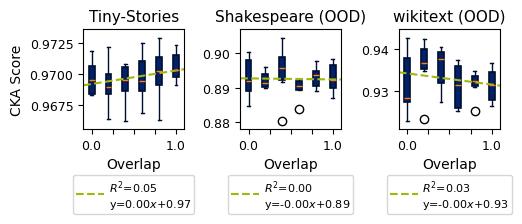

In [19]:
######### plotting for nanogpt, dataset overlap


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# dataset = "shakespeare"
dataset = "tinystories"

# Load data
df = pd.read_csv(f'./plotting_results_iclr2026/nanogpt_{dataset}_ds_platonic.csv')

plot_columns = None
metric_to_exp_dict = None
# Define metrics and plot layout
if dataset == "tinystories":
    plot_columns = ['metric_tinystories','metric_shakespeare','metric_wikitext']
    metric_to_exp_dict = {
        'metric_tinystories': "Tiny-Stories",
        'metric_wikitext': "wikitext (OOD)",
        'metric_shakespeare': "Shakespeare (OOD)"
    }
elif dataset == "shakespeare":
    plot_columns = ['metric_shakespeare','metric_tinystories','metric_wikitext']
    metric_to_exp_dict = {
        'metric_tinystories': "Tiny-Stories (OOD)",
        'metric_wikitext': "wikitext (OOD)",
        'metric_shakespeare': "Shakespeare"
    }
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(plot_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

frac_values = sorted(df['frac_overlap'].unique())
x_min, x_max = min(frac_values), max(frac_values)
padding = 0.1 * (x_max - x_min)
x_min -= padding
x_max += padding

for i, metric in enumerate(unique_metrics):
    df_metric = df[df['metric'] == metric]
    
    for j, col in enumerate(plot_columns):
        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][col].values for frac in frac_values]
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5)
        )
        
        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[col].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(metric_to_exp_dict[col], fontsize=11)

# Final layout
# fig.tight_layout()
fig.savefig(f"./plotting_final_figures_iclr2026/nanogpt_{dataset}_ds_overlap.pdf", bbox_inches='tight')
plt.show()

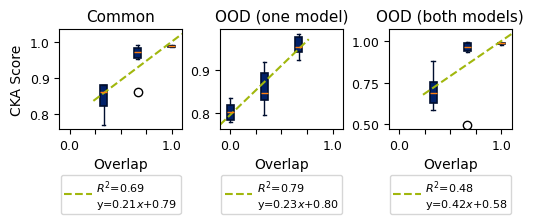

In [17]:
######### plotting for nanogpt, task overlap


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "all"

# Load data
df = pd.read_csv(f'./plotting_results_iclr2026/nanogpt_{dataset}_task_platonic.csv')

# Define metrics and plot layout
plot_columns = ['metric_common', 'metric_OOD_for_one', 'metric_OOD_for_all']

metric_to_exp_dict = {
    'metric_common': "Common",
    'metric_OOD_for_one': "OOD (one model)",
    'metric_OOD_for_all': "OOD (both models)",
}
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(plot_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

frac_values = sorted(df['frac_overlap'].unique())
x_min, x_max = min(frac_values), max(frac_values)
padding = 0.1 * (x_max - x_min)
x_min -= padding
x_max += padding


for i, metric in enumerate(unique_metrics):
    df_metric = df[df['metric'] == metric]
    
    for j, col in enumerate(plot_columns):
        ax = axes[j] if n_rows == 1 else axes[i, j]
        df_pruned = df_metric.copy()
        if col == "metric_OOD_for_one":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 1]  # ood
            # x_vals = [0.0, 0.2, 0.4, 0.6, 0.8]
        elif col == "metric_common" or col == "metric_OOD_for_all":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 0]  # overlap
            # x_vals = [0.2, 0.4, 0.6, 0.8, 1.0]
        
        data_to_plot = [df_pruned[df_pruned['frac_overlap'] == frac][col].values for frac in frac_values]
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5)
        )
        
        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        ax.tick_params(axis='x', labelsize=9)
        
        
        X = df_pruned[['frac_overlap']].values
        y = df_pruned[col].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(min(X)-padding, max(X)+padding, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(metric_to_exp_dict[col], fontsize=11)

# Final layout
# fig.tight_layout()
fig.savefig(f"./plotting_final_figures_iclr2026/nanogpt_{dataset}_task_overlap.pdf", bbox_inches='tight')
plt.show()

### LLM finetuning

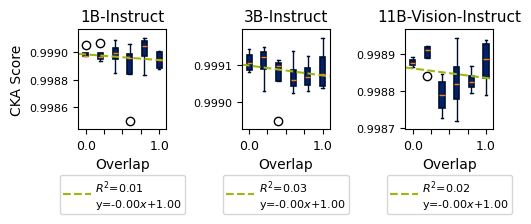

In [16]:
######### plotting for LLM, dataset overlap


import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.patches import Patch
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Define metrics and plot layout
plot_column = 'metric_tinycodes'

model_names = ['1B-Instruct', '3B-Instruct', '11B-Vision-Instruct']

unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)



for i, metric in enumerate(unique_metrics):
    
    
    for j, name in enumerate(model_names):
        df = pd.read_csv(f'./plotting_results_iclr2026/llm_ds/ds_meta-llama_Llama-3.2-{name}.csv')
        
        frac_values = sorted(df['frac_overlap'].unique())
        x_min, x_max = min(frac_values), max(frac_values)
        padding = 0.1 * (x_max - x_min)
        x_min -= padding
        x_max += padding
        
        
        df_metric = df[df['metric'] == metric]
        ax = axes[j] if n_rows == 1 else axes[i, j]

        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][plot_column].values for frac in frac_values]
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5), 
        )

        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[plot_column].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        ax.tick_params('y', labelsize=8)
        ax.get_yaxis().get_major_formatter().set_useOffset(False)
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(name, fontsize=11)

# Final layout
# fig.tight_layout()

fig.savefig(f"./plotting_final_figures_iclr2026/llm_ds_overlap.pdf", bbox_inches='tight')
plt.show()

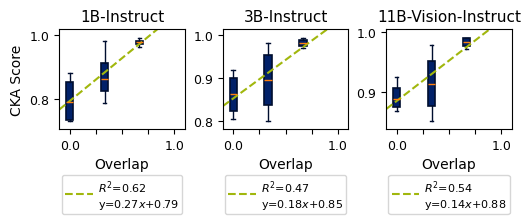

In [15]:
######### plotting for LLM, task overlap

import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.patches import Patch
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


# Define metrics and plot layout
plot_column = 'metric_OOD_for_one'

model_names = ['1B-Instruct', '3B-Instruct', '11B-Vision-Instruct']

unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)



for i, metric in enumerate(unique_metrics):
    
    
    for j, name in enumerate(model_names):
        df = pd.read_csv(f'./plotting_results_iclr2026/llm_task/task_meta-llama_Llama-3.2-{name}.csv')
        
        frac_values = sorted(df['frac_overlap'].unique())
        x_min, x_max = min(frac_values), max(frac_values)
        padding = 0.1 * (x_max - x_min)
        x_min -= padding
        x_max += padding
        
        
        df_metric = df[df['metric'] == metric]
        df_metric = df_metric[df_metric["frac_overlap"] != 1]  # ood

        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][plot_column].values for frac in frac_values]
        
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5), 
        )

        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[plot_column].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(name, fontsize=11)

# Final layout
# fig.tight_layout()

fig.savefig(f"./plotting_final_figures_iclr2026/llm_task_overlap.pdf", bbox_inches='tight')
plt.show()

### Transfer attacks

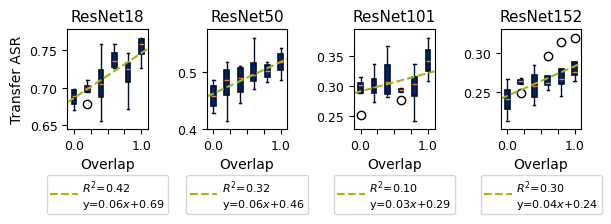

In [1]:
######### plotting for ResNet/ViT, dataset overlap, transfer attack


import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.patches import Patch
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "tinyimagenet"

# Load data
# df = pd.read_csv(f'./plotting_results/resnet_{dataset}_ds_platonic.csv')

# Define metrics and plot layout

resnet_models = ['resnet18', 'resnet50', 'resnet101', 'resnet152']
vit_models = ['vit_tiny_patch16_224', 'vit_small_patch32_224', 'vit_base_patch32_224', 'vit_large_patch32_224']
model_name = "resnet"

model_to_text = {'resnet18':'ResNet18','resnet50':'ResNet50','resnet101':"ResNet101",'resnet152':'ResNet152',
                 'vit_tiny_patch16_224':'ViT/tiny','vit_small_patch32_224':'ViT/small',
                 'vit_base_patch32_224':'ViT/base','vit_large_patch32_224':'ViT/large'}

model_names = resnet_models if "resnet" in model_name else vit_models

unique_metrics = ['transfer_asr']

metric_to_full_metric_dict = {"transfer_asr":"Transfer ASR"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.5 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)



for i, metric in enumerate(unique_metrics):
    
    
    for j, name in enumerate(model_names):
        df = pd.read_csv(f'./plotting_results_iclr2026/different_model_size_ds/ds_transfer_asr_{name}_{dataset}.csv')
        
        frac_values = sorted(df['frac_overlap'].unique())
        x_min, x_max = min(frac_values), max(frac_values)
        padding = 0.1 * (x_max - x_min)
        x_min -= padding
        x_max += padding
        
        
        df_metric = df
        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][metric].values for frac in frac_values]
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5), 
        )

        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[metric].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(model_to_text[name], fontsize=11)

# Final layout
# fig.tight_layout()

fig.savefig(f"./plotting_final_figures_iclr2026/{model_name}_{dataset}_ds_overlap_transfer_asr.pdf", bbox_inches='tight')
plt.show()

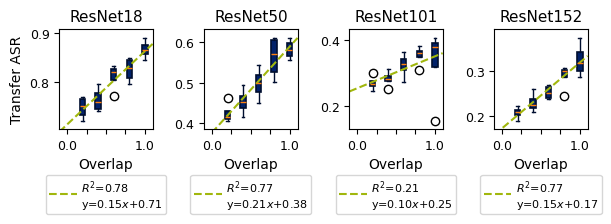

In [2]:
######### plotting for ResNet/ViT, task overlap, transfer attack


import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.patches import Patch
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "tinyimagenet"

# Define metrics and plot layout

resnet_models = ['resnet18', 'resnet50', 'resnet101', 'resnet152']
vit_models = ['vit_tiny_patch16_224', 'vit_small_patch32_224', 'vit_base_patch32_224', 'vit_large_patch32_224']
model_name = "resnet"

model_to_text = {'resnet18':'ResNet18','resnet50':'ResNet50','resnet101':"ResNet101",'resnet152':'ResNet152',
                 'vit_tiny_patch16_224':'ViT/tiny','vit_small_patch32_224':'ViT/small',
                 'vit_base_patch32_224':'ViT/base','vit_large_patch32_224':'ViT/large'}

model_names = resnet_models if "resnet" in model_name else vit_models

unique_metrics = ['transfer_asr']

metric_to_full_metric_dict = {"transfer_asr":"Transfer ASR"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.5 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)



for i, metric in enumerate(unique_metrics):
    
    
    for j, name in enumerate(model_names):
        df = pd.read_csv(f'./plotting_results_iclr2026/different_model_size_task/task_transfer_asr_{name}_{dataset}.csv')
        
        frac_values = sorted(df['frac_overlap'].unique())
        x_min, x_max = min(frac_values), max(frac_values)
        padding = 0.1 * (x_max - x_min)
        x_min -= padding
        x_max += padding
        
        
        df_metric = df[df["frac_overlap"] != 0]  # ood
        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][metric].values for frac in frac_values]
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5), 
        )

        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[metric].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(model_to_text[name], fontsize=11)

# Final layout
# fig.tight_layout()

fig.savefig(f"./plotting_final_figures_iclr2026/{model_name}_{dataset}_task_overlap_transfer_asr.pdf", bbox_inches='tight')
plt.show()

### LLM jailbreaking

[np.float64(0.795), np.float64(0.7975), np.float64(0.8425), np.float64(0.81)]
[np.float64(0.8825000000000001), np.float64(0.875), np.float64(0.86), np.float64(0.8825)]
[np.float64(0.9249999999999999), np.float64(0.9524999999999999), np.float64(0.97), np.float64(0.945)]


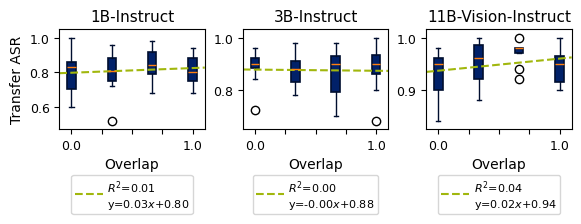

In [ ]:
######### plotting for LLM jailbreaking (transfer), ds or task, llama judge


import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.patches import Patch
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


# Define metrics and plot layout


model_names = ['1B-Instruct', '3B-Instruct', '11B-Vision-Instruct']

unique_metrics = ['transfer_asr']
# unique_metrics = ['normal_asr']


metric_to_full_metric_dict = {"transfer_asr":"Transfer ASR", "normal_asr":"Normal ASR"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.9 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

task_or_ds = 'task'
# task_or_ds = 'ds'

for i, metric in enumerate(unique_metrics):
    
    
    for j, name in enumerate(model_names):
        df = pd.read_csv(f'./plotting_results_iclr2026/llm_{task_or_ds}/{task_or_ds}_meta-llama_Llama-3.2-{name}_jailbreaking.csv')

        frac_values = sorted(df['frac_overlap'].unique())
        x_min, x_max = min(frac_values), max(frac_values)
        padding = 0.1 * (x_max - x_min)
        x_min -= padding
        x_max += padding
        
        
        # df_metric = df[df["frac_overlap"] != 0]  # ood
        df_metric = df
        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][metric].values for frac in frac_values]
        print([d.mean() for d in data_to_plot])
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5), 
        )

        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[metric].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(name, fontsize=11)

# Final layout
# fig.tight_layout()

fig.savefig(f"./plotting_final_figures_iclr2026/llm_{task_or_ds}_overlap_transfer_asr.pdf", bbox_inches='tight')
plt.show()

[np.float64(0.165), np.float64(0.1375), np.float64(0.1975), np.float64(0.16)]
[np.float64(0.545), np.float64(0.47250000000000003), np.float64(0.5900000000000001), np.float64(0.5974999999999999)]
[np.float64(0.61), np.float64(0.5925), np.float64(0.6125), np.float64(0.69)]


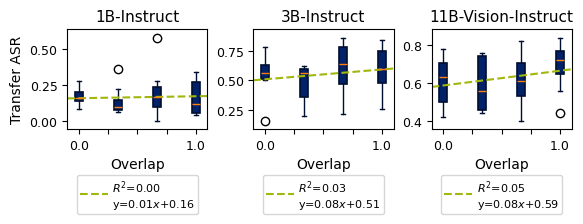

In [2]:
######### plotting for LLM jailbreaking (transfer), ds or task, gpt5 judge


import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.patches import Patch
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


# Define metrics and plot layout


model_names = ['1B-Instruct', '3B-Instruct', '11B-Vision-Instruct']

unique_metrics = ['transfer_asr']
# unique_metrics = ['normal_asr']


metric_to_full_metric_dict = {"transfer_asr":"Transfer ASR", "normal_asr":"Normal ASR"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(model_names)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.9 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

task_or_ds = 'task'
# task_or_ds = 'ds'

for i, metric in enumerate(unique_metrics):
    
    
    for j, name in enumerate(model_names):
        df = pd.read_csv(f'./plotting_results_iclr2026/llm_{task_or_ds}/gpt5_judge_{task_or_ds}_meta-llama_Llama-3.2-{name}_jailbreaking.csv')

        frac_values = sorted(df['frac_overlap'].unique())
        x_min, x_max = min(frac_values), max(frac_values)
        padding = 0.1 * (x_max - x_min)
        x_min -= padding
        x_max += padding
        
        
        # df_metric = df[df["frac_overlap"] != 0]  # ood
        df_metric = df
        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][metric].values for frac in frac_values]
        print([d.mean() for d in data_to_plot])
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5), 
        )

        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[metric].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(name, fontsize=11)

# Final layout
# fig.tight_layout()

fig.savefig(f"./plotting_final_figures_iclr2026/llm_gpt5_judge_{task_or_ds}_overlap_transfer_asr.pdf", bbox_inches='tight')
plt.show()

## Helper images for figures

In [1]:
### example images from partitioned dataset. 
import time, os, torch
from torchvision import datasets
from PIL import Image
import matplotlib.pyplot as plt 


class CollapsedImageFolder(torch.utils.data.Dataset):
    def __init__(self, root, collapse_by, transform=None):
        """
        root: path to dataset structured as ImageFolder
        collapse_by: tuple of labels to collapse by, e.g. ('shape', 'digit')
        transform: optional torchvision transform
        """
        self.root = root
        self.transform = transform
        self.collapse_by = collapse_by
        self.original_dataset = datasets.ImageFolder(root=root)

        # Map from original class name to (shape, digit, color)
        self.orig_classname_map = {}
        self.classname_to_label = {}
        self.samples = []

        # Parse and generate collapsed labels
        self._prepare()

    def _prepare(self):
        label_set = set()

        for img_path, _ in self.original_dataset.samples:
            class_name = os.path.basename(os.path.dirname(img_path))  # e.g., "circle_7_blue"

            try:
                shape, digit, color = class_name.split("_")
            except ValueError:
                print(f"Skipping malformed class name: {class_name}")
                continue

            label_parts = {'shape': shape, 'digit': digit, 'color': color}
            collapsed_key = "_".join([label_parts[k] for k in self.collapse_by])
            label_set.add(collapsed_key)
            self.samples.append((img_path, collapsed_key))

        # Create label-to-index mapping
        sorted_labels = sorted(list(label_set))
        self.classname_to_label = {name: idx for idx, name in enumerate(sorted_labels)}

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, collapsed_classname = self.samples[idx]
        img = Image.open(path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        label = self.classname_to_label[collapsed_classname]
        return img, label


partition_base = "../combined_dataset_ffcv/all_partitions"
partition3_path = f"{partition_base}/partition3/val"
ds = CollapsedImageFolder(partition3_path, collapse_by=('shape', 'digit'))


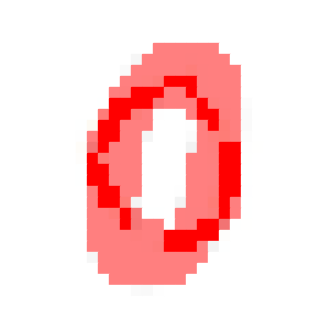

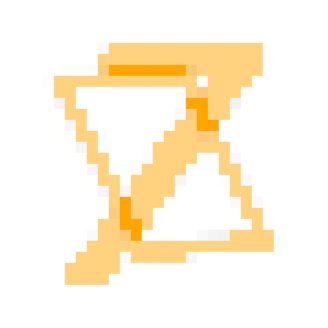

In [85]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load 28x28 image as array (normalized to [0,1] if needed)
idx = [800, 27596]

for i in idx:
    img = np.asarray(ds[i][0]) / 255.0   # Replace with your image

    # If image is 28x28x3, skip
    h, w = img.shape[:2]

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')

    # Draw each pixel as a square
    for y in range(h):
        for x in range(w):
            color = img[y, x]
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor=color, linewidth=1,
                snap=True))

    # Save as vector image: PDF or SVG — perfectly sharp at any size
    fig.savefig(f"./plotting_final_figures/partition_example_image_idx{i}.pdf", bbox_inches='tight', pad_inches=0)


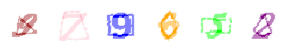

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load 28x28 image as array (normalized to [0,1] if needed)
idx = [0, 11110, 22220, 33330, 44440, 55550]
idx_rev = reversed([-67277, -44651, -33420, -41000, -12345, -898])

fig, axes = plt.subplots(1, 6, figsize=(3, 20))
# for ax_idx, i in enumerate(idx):
for ax_idx, i in enumerate(idx_rev):
    ax = axes[ax_idx]
    img = np.asarray(ds[i][0]) / 255.0   # Replace with your image

    # If image is 28x28x3, skip
    h, w = img.shape[:2]

    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')

    # Draw each pixel as a square
    for y in range(h):
        for x in range(w):
            color = img[y, x]
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor=color, linewidth=1,
                snap=True))

    # Save as vector image: PDF or SVG — perfectly sharp at any size
fig.tight_layout()
fig.savefig(f"./plotting_final_figures/partition_image_arr.pdf", bbox_inches='tight', pad_inches=0)
# fig.savefig(f"./plotting_final_figures/partition_image_arr_rev.pdf", bbox_inches='tight', pad_inches=0)


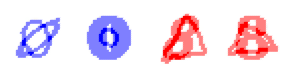

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load 28x28 image as array (normalized to [0,1] if needed)
idx = [0, 1, -1101, -1102]

fig, axes = plt.subplots(1, len(idx), figsize=(3, len(idx)*3))
for ax_idx, i in enumerate(idx):
    ax = axes[ax_idx]
    img = np.asarray(ds[i][0]) / 255.0   # Replace with your image

    # If image is 28x28x3, skip
    h, w = img.shape[:2]

    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')

    # Draw each pixel as a square
    for y in range(h):
        for x in range(w):
            color = img[y, x]
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor=color, linewidth=1,
                snap=True))

    # Save as vector image: PDF or SVG — perfectly sharp at any size
fig.tight_layout()
fig.savefig(f"./plotting_final_figures/partition_image_arr_partition3.pdf", bbox_inches='tight', pad_inches=0)

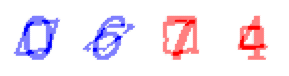

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load 28x28 image as array (normalized to [0,1] if needed)
idx = [200_00, 260_07, -221_59, -251_02]

fig, axes = plt.subplots(1, len(idx), figsize=(3, len(idx)*3))
for ax_idx, i in enumerate(idx):
    ax = axes[ax_idx]
    img = np.asarray(ds[i][0]) / 255.0   # Replace with your image

    # If image is 28x28x3, skip
    h, w = img.shape[:2]

    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')

    # Draw each pixel as a square
    for y in range(h):
        for x in range(w):
            color = img[y, x]
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor=color, linewidth=1,
                snap=True))

    # Save as vector image: PDF or SVG — perfectly sharp at any size
fig.tight_layout()
fig.savefig(f"./plotting_final_figures/partition_image_arr_partition2_shape_color.pdf", bbox_inches='tight', pad_inches=0)

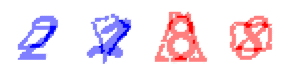

In [99]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load 28x28 image as array (normalized to [0,1] if needed)
idx = [220_50, 120_52, -111_05, -411_06]

fig, axes = plt.subplots(1, len(idx), figsize=(3, len(idx)*3))
for ax_idx, i in enumerate(idx):
    ax = axes[ax_idx]
    img = np.asarray(ds[i][0]) / 255.0   # Replace with your image

    # If image is 28x28x3, skip
    h, w = img.shape[:2]

    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')

    # Draw each pixel as a square
    for y in range(h):
        for x in range(w):
            color = img[y, x]
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor=color, linewidth=1,
                snap=True))

    # Save as vector image: PDF or SVG — perfectly sharp at any size
fig.tight_layout()
fig.savefig(f"./plotting_final_figures/partition_image_arr_partition2_color_digit.pdf", bbox_inches='tight', pad_inches=0)

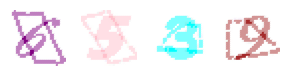

In [105]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load 28x28 image as array (normalized to [0,1] if needed)
idx = [267_50, 256_52, -167_05, -108_06]

fig, axes = plt.subplots(1, len(idx), figsize=(3, len(idx)*3))
for ax_idx, i in enumerate(idx):
    ax = axes[ax_idx]
    img = np.asarray(ds[i][0]) / 255.0   # Replace with your image

    # If image is 28x28x3, skip
    h, w = img.shape[:2]

    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')

    # Draw each pixel as a square
    for y in range(h):
        for x in range(w):
            color = img[y, x]
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor=color, linewidth=1,
                snap=True))

    # Save as vector image: PDF or SVG — perfectly sharp at any size
fig.tight_layout()
fig.savefig(f"./plotting_final_figures/partition_image_arr_partition1_shape.pdf", bbox_inches='tight', pad_inches=0)

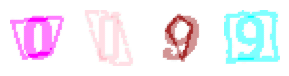

In [113]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load 28x28 image as array (normalized to [0,1] if needed)
idx = [604_87, 206_51, 191_20, 592_50]

fig, axes = plt.subplots(1, len(idx), figsize=(3, len(idx)*3))
for ax_idx, i in enumerate(idx):
    ax = axes[ax_idx]
    img = np.asarray(ds[i][0]) / 255.0   # Replace with your image

    # If image is 28x28x3, skip
    h, w = img.shape[:2]

    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')

    # Draw each pixel as a square
    for y in range(h):
        for x in range(w):
            color = img[y, x]
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor=color, linewidth=1,
                snap=True))

    # Save as vector image: PDF or SVG — perfectly sharp at any size
fig.tight_layout()
fig.savefig(f"./plotting_final_figures/partition_image_arr_partition1_digit.pdf", bbox_inches='tight', pad_inches=0)

## Regression and Mutual information computations.


### All ResNet/ViT

In [1]:
###### mutual information and regression (task overlap, resnet and ViT)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


resnet_models = ['resnet18', 'resnet50', 'resnet101', 'resnet152']
vit_models = ['vit_tiny_patch16_224', 'vit_small_patch32_224', 'vit_base_patch32_224', 'vit_large_patch32_224']
model_names = resnet_models + vit_models
datasets = ["cifar100", "tinyimagenet"]

for ds in datasets:
    for model_name in model_names:
        df = pd.read_csv(f'./plotting_results_iclr2026/different_model_size_task/task_platonic_ffcv_{model_name}_{ds}.csv')

        # Filter to only CKA metric
        cka_df = df[df['metric'] == 'cka']

        # Target columns
        target_columns = [
            'metric_ood_one',
        ]

        results = {}
        # Loop over each target metric
        for target in target_columns:
            # Copy and apply filtering
            df_pruned = cka_df.copy()
            if target == "metric_ood_one":
                df_pruned = df_pruned[df_pruned["frac_overlap"] != 1.0]
            elif target == "metric_overlap":
                df_pruned = df_pruned[df_pruned["frac_overlap"] != 0.0]
            
            # Input and target
            X = df_pruned[['frac_overlap']].values
            y = df_pruned[target].values
            # Compute mutual information
            mi = mutual_info_regression(X, y, random_state=42)
            
            # Linear regression
            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            slope = model.coef_[0]
            r_squared = r2_score(y, y_pred)

            results[target] = {'mutual_information': mi[0], 
                            #    'slope': slope,
                'r_squared': r_squared}

        # Convert to DataFrame and print
        results_df = pd.DataFrame(results).T
        # print(results_df)
        # print(dataset)
        results_df.to_csv(f"./regression_iclr2026/{model_name}_{ds}_task_regression_mi.txt")


In [ ]:
###### mutual information and regression (dataset overlap, resnet and ViT)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


resnet_models = ['resnet18', 'resnet50', 'resnet101', 'resnet152']
vit_models = ['vit_tiny_patch16_224', 'vit_small_patch32_224', 'vit_base_patch32_224', 'vit_large_patch32_224']
model_names = resnet_models + vit_models
datasets = ["cifar100", "tinyimagenet"]

for ds in datasets:
    for model_name in model_names:
        df = pd.read_csv(f'./plotting_results_iclr2026/different_model_size_ds/ds_platonic_ffcv_{model_name}_{ds}.csv')

        cka_df = df[df['metric'] == 'cka']
        
        target_columns = [
            f'metric_{ds}',
        ]

        # Dictionary to store results
        results = {}

        # Loop over each target metric
        for target in target_columns:
            # Copy and apply filtering
            df_pruned = cka_df.copy()
            
            # Input and target
            X = df_pruned[['frac_overlap']].values
            y = df_pruned[target].values

            # Standardize (optional but helps stability)
            mi = mutual_info_regression(X, y, random_state=42)
            
            # Linear regression
            model = LinearRegression()
            model.fit(X, y)
            y_pred = model.predict(X)
            slope = model.coef_[0]
            r_squared = r2_score(y, y_pred)
            
            results[target] = {'mutual_information': mi[0], 
                            #    'slope': slope,
                'r_squared': r_squared}

        # Convert to DataFrame and print
        results_df = pd.DataFrame(results).T
        # print(results_df)
        # print(dataset)
        results_df.to_csv(f"./regression_iclr2026/{model_name}_{ds}_ds_regression_mi.txt")


In [1]:
###### mutual information and regression (partitioned data, resnet and ViT))

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

resnet_models = ['resnet18', 'resnet50', 'resnet101', 'resnet152']
vit_models = ['vit_tiny_patch16_224', 'vit_small_patch32_224', 'vit_base_patch32_224', 'vit_large_patch32_224']
model_names = resnet_models + vit_models


for model_name in model_names:

    # Load the data
    df = pd.read_csv(f"./plotting_results_iclr2026/different_model_size_csd/csd_platonic_ffcv_{model_name}.csv")

    # Only use rows where metric == 'cka'
    cka_df = df[df['metric'] == 'cka'].copy()

    # Map partition names to numerical x-axis values
    partition_mapping = {
        'partition1': 0.0,
        'partition2': 0.5,
        'partition3': 1.0
    }
    cka_df['partition_x'] = cka_df['partition'].map(partition_mapping)

    # Target columns to analyze
    target_columns = ['partition_metric', ]

    # Results storage
    results = {}

    # Loop through each target
    for target in target_columns:
        # Prepare x and y
        X = cka_df[['partition_x']].values
        y = cka_df[target].values

        # Compute R² using linear regression
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = model.score(X, y)

        # Compute mutual information
        X_scaled = StandardScaler().fit_transform(X)
        mi = mutual_info_regression(X_scaled, y, random_state=42)[0]

        results[target] = {
            'mutual_information': mi,
            'r_squared': r_squared
        }

    # Convert results to DataFrame and display
    results_df = pd.DataFrame(results).T
    print(results_df)
    results_df.to_csv(f"./regression_iclr2026/{model_name}_csd_regression_mi.txt")

                  mutual_information  r_squared
partition_metric             1.00248   0.834118
                  mutual_information  r_squared
partition_metric            0.688448   0.782221
                  mutual_information  r_squared
partition_metric            0.688448    0.78316
                  mutual_information  r_squared
partition_metric             1.00248   0.823395
                  mutual_information  r_squared
partition_metric             1.00248   0.836651
                  mutual_information  r_squared
partition_metric             1.00248   0.875797
                  mutual_information  r_squared
partition_metric             1.00248   0.799162
                  mutual_information  r_squared
partition_metric            0.737632   0.647974


## NanoGPT

In [2]:
###### mutual information and regression (task overlap, nanoGPT)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "all"

# Load data
df = pd.read_csv(f'./plotting_results_iclr2026/nanogpt_{dataset}_task_platonic.csv')

# Filter to only CKA metric
cka_df = df[df['metric'] == 'cka']

# Target columns
target_columns = [
    'metric_common',
    'metric_OOD_for_one',
    'metric_OOD_for_all',
]

results = {}
# Loop over each target metric
for target in target_columns:
    # Copy and apply filtering
    df_pruned = cka_df.copy()
    if target == "metric_ood_one":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 1.0]
    elif target == "metric_overlap":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 0.0]
    
    # Input and target
    X = df_pruned[['frac_overlap']].values
    y = df_pruned[target].values
    # Compute mutual information
    mi = mutual_info_regression(X, y, random_state=42)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    r_squared = r2_score(y, y_pred)

    results[target] = {'mutual_information': mi[0], 
                    #    'slope': slope,
        'r_squared': r_squared}

# Convert to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)
print(dataset)
results_df.to_csv(f"./regression_iclr2026/nanogpt_{dataset}_task_regression_mi.txt")

                    mutual_information  r_squared
metric_common                 1.121246   0.657308
metric_OOD_for_one            1.073610   0.533744
metric_OOD_for_all            0.961905   0.704947
all


In [4]:
###### mutual information and regression (ds overlap, gpt2)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

datasets = ["tinystories", "shakespeare"]
for dataset in datasets:
    # Load data
    df = pd.read_csv(f'./plotting_results_iclr2026/nanogpt_{dataset}_ds_platonic.csv')

    # Filter to only CKA metric
    cka_df = df[df['metric'] == 'cka']

    # Target columns
    target_columns = None
    metric_to_exp_dict = None
    # Define metrics and plot layout
    if dataset == "tinystories":
        target_columns = ['metric_tinystories','metric_shakespeare','metric_wikitext']
        metric_to_exp_dict = {
            'metric_tinystories': "Tiny-Stories",
            'metric_wikitext': "wikitext (OOD)",
            'metric_shakespeare': "Shakespeare (OOD)"
        }
    elif dataset == "shakespeare":
        target_columns = ['metric_shakespeare','metric_tinystories','metric_wikitext']
        metric_to_exp_dict = {
            'metric_tinystories': "Tiny-Stories (OOD)",
            'metric_wikitext': "wikitext (OOD)",
            'metric_shakespeare': "Shakespeare"
        }
        
    results = {}
    # Loop over each target metric
    for target in target_columns:
        # Copy and apply filtering
        df_pruned = cka_df.copy()
        if target == "metric_ood_one":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 1.0]
        elif target == "metric_overlap":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 0.0]
        
        # Input and target
        X = df_pruned[['frac_overlap']].values
        y = df_pruned[target].values
        # Compute mutual information
        mi = mutual_info_regression(X, y, random_state=42)
        
        # Linear regression
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        r_squared = r2_score(y, y_pred)

        results[metric_to_exp_dict[target]] = {'mutual_information': mi[0], 
                        #    'slope': slope,
            'r_squared': r_squared}

    # Convert to DataFrame and print
    results_df = pd.DataFrame(results).T
    print(results_df)
    print(dataset)
    results_df.to_csv(f"./regression_iclr2026/nanogpt_{dataset}_ds_regression_mi.txt")

                   mutual_information  r_squared
Tiny-Stories                 0.000000   0.045366
Shakespeare (OOD)            0.000000   0.000444
wikitext (OOD)               0.172458   0.025909
tinystories
                    mutual_information  r_squared
Shakespeare                   0.529116   0.534954
Tiny-Stories (OOD)            0.390848   0.442303
wikitext (OOD)                0.097522   0.193240
shakespeare


## LLM finetuning

In [1]:
###### mutual information and regression (ds overlap, gpt2)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model_names = ['1B-Instruct', '3B-Instruct', '11B-Vision-Instruct']

for model_name in model_names:
    # Load data
    df = pd.read_csv(f'./plotting_results_iclr2026/llm_ds/ds_meta-llama_Llama-3.2-{model_name}.csv')

    # Filter to only CKA metric
    cka_df = df[df['metric'] == 'cka']
    
    # Define metrics and plot layout
    target_columns = ['metric_tinycodes']
    metric_to_exp_dict = {'metric_tinycodes': "Tiny-Codes",}

        
    results = {}
    # Loop over each target metric
    for target in target_columns:
        # Copy and apply filtering
        df_pruned = cka_df.copy()
        # Input and target
        X = df_pruned[['frac_overlap']].values
        y = df_pruned[target].values
        # Compute mutual information
        mi = mutual_info_regression(X, y, random_state=42)
        
        # Linear regression
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        r_squared = r2_score(y, y_pred)

        results[metric_to_exp_dict[target]] = {'mutual_information': mi[0], 
                        #    'slope': slope,
            'r_squared': r_squared}

    # Convert to DataFrame and print
    results_df = pd.DataFrame(results).T
    print(results_df)
    results_df.to_csv(f"./regression_iclr2026/llm_llama_Llama-3.2-{model_name}_ds_regression_mi.txt")

            mutual_information  r_squared
Tiny-Codes                 0.0   0.013501
            mutual_information  r_squared
Tiny-Codes            0.026921   0.032932
            mutual_information  r_squared
Tiny-Codes            0.221066   0.020577


In [3]:
###### mutual information and regression (ds overlap, gpt2)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model_names = ['1B-Instruct', '3B-Instruct', '11B-Vision-Instruct']

for model_name in model_names:
    # Load data
    df = pd.read_csv(f'./plotting_results_iclr2026/llm_task/task_meta-llama_Llama-3.2-{model_name}.csv')

    # Filter to only CKA metric
    cka_df = df[df['metric'] == 'cka']
    
    # Define metrics and plot layout
    target_columns = ['metric_OOD_for_one']
    metric_to_exp_dict = {'metric_OOD_for_one': "OOD",}

        
    results = {}
    # Loop over each target metric
    for target in target_columns:
        # Copy and apply filtering
        df_pruned = cka_df.copy()
        if target == "metric_OOD_for_one":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 1.0]
        
        # Input and target
        X = df_pruned[['frac_overlap']].values
        y = df_pruned[target].values
        # Compute mutual information
        mi = mutual_info_regression(X, y, random_state=42)
        
        # Linear regression
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        r_squared = r2_score(y, y_pred)

        results[metric_to_exp_dict[target]] = {'mutual_information': mi[0], 
                        #    'slope': slope,
            'r_squared': r_squared}

    # Convert to DataFrame and print
    results_df = pd.DataFrame(results).T
    print(results_df)
    results_df.to_csv(f"./regression_iclr2026/llm_llama_Llama-3.2-{model_name}_task_regression_mi.txt")

     mutual_information  r_squared
OOD            0.286709   0.619442
     mutual_information  r_squared
OOD            0.217992   0.472831
     mutual_information  r_squared
OOD            0.398746   0.542877


## Diffusion models

In [1]:
###### mutual information and regression (task overlap, diffusion)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dataset = "cifar10"

# Load data
df = pd.read_csv(f'./plotting_results_iclr2026/diffusion_{dataset}_task.csv')

# Filter to only CKA metric
# cka_df = df[df['metric'] == 'cka']
cknna = df[df['metric'] == 'cknna']

# Target columns
target_columns = [
    'metric_ood_one',
]

results = {}
# Loop over each target metric
for target in target_columns:
    # Copy and apply filtering
    df_pruned = cknna.copy()
    if target == "metric_ood_one":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 1.0]
    elif target == "metric_overlap":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 0.0]
    
    # Input and target
    X = df_pruned[['frac_overlap']].values
    y = df_pruned[target].values

    # Compute mutual information
    mi = mutual_info_regression(X, y, random_state=42)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    r_squared = r2_score(y, y_pred)

    results[target] = {'mutual_information': mi[0], 
                    #    'slope': slope,
        'r_squared': r_squared}

# Convert to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)
print(dataset)
results_df.to_csv(f"./regression_iclr2026/diffusion_{dataset}_task_regression_mi.txt")

                mutual_information  r_squared
metric_ood_one             0.83514   0.819754
cifar10


In [1]:
###### mutual information and regression (task overlap, diffusion)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "cifar10"

# Load data
df = pd.read_csv(f'./plotting_results_iclr2026/diffusion_{dataset}_ds.csv')

# Filter to only CKA metric
# cka_df = df[df['metric'] == 'cka']
cknna = df[df['metric'] == 'cknna']

# Target columns
target_columns = [
    'metric_train_ds',
]

results = {}
# Loop over each target metric
for target in target_columns:
    # Copy and apply filtering
    df_pruned = cknna.copy()
    
    # Input and target
    X = df_pruned[['frac_overlap']].values
    y = df_pruned[target].values
    # Compute mutual information
    mi = mutual_info_regression(X, y, random_state=42)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    r_squared = r2_score(y, y_pred)

    results[target] = {'mutual_information': mi[0], 
                    #    'slope': slope,
        'r_squared': r_squared}

# Convert to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)
print(dataset)
results_df.to_csv(f"./regression_iclr2026/diffusion_{dataset}_ds_regression_mi.txt")

                 mutual_information  r_squared
metric_train_ds            0.216526   0.421747
cifar10


### Compute mean mutual information and mean r^2 for task & dataset split & partition 

In [3]:
import os
import pandas as pd

# Path to the directory
regression_dir = "./regression_iclr2026"

# Group containers
groups = {
    'ds': [],
    'task+ds': [],
    'task-only': []
}

# Categorize files
for fname in os.listdir(regression_dir):
    if "_ds_" in fname:
        groups['ds'].append(os.path.join(regression_dir, fname))
    elif "_task_" in fname:
        groups['task+ds'].append(os.path.join(regression_dir, fname))
    elif "_csd_" in fname:
        groups['task-only'].append(os.path.join(regression_dir, fname))

# Function to compute mean MI and R² across a group of files
def compute_group_averages(file_list):
    all_mi = []
    all_r2 = []
    for file in file_list:
        df = pd.read_csv(file, index_col=0)
        all_mi.extend(df['mutual_information'].dropna().tolist())
        all_r2.extend(df['r_squared'].dropna().tolist())
    mi_avg = sum(all_mi) / len(all_mi) if all_mi else 0.0
    r2_avg = sum(all_r2) / len(all_r2) if all_r2 else 0.0
    return mi_avg, r2_avg

# Compute results for each group
results = {}
for group_name, files in groups.items():
    mi_avg, r2_avg = compute_group_averages(files)
    results[group_name] = {
        'avg_mutual_information': mi_avg,
        'avg_r_squared': r2_avg
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


           avg_mutual_information  avg_r_squared
ds                       0.809352       0.589976
task+ds                  0.792208       0.756397
task-only                0.890866       0.797810


In [2]:
import os
import pandas as pd
from collections import defaultdict

# Directory containing files
regression_dir = "./regression_iclr2026"

# Define groups
group_files = {
    'ds': [],
    'task+ds': [],
    'task-only': []
}

# Categorize files
for fname in os.listdir(regression_dir):
    if "_ds_" in fname:
        # group_files['ds'].append(os.path.join(regression_dir, fname))
        group_files['ds'].append(fname)
    elif "_task_" in fname:
        # group_files['task+ds'].append(os.path.join(regression_dir, fname))
        group_files['task+ds'].append(fname)
    elif "_csd_" in fname:
        # group_files['task-only'].append(os.path.join(regression_dir, fname))
        group_files['task-only'].append(fname)

# Architecture inference
def get_architecture(filename):
    if "resnet" in filename:
        return "resnet"
    elif "vit" in filename:
        return "vit"
    elif "nanogpt" in filename:
        return "nanogpt"
    elif "llama" in filename:
        return "llama"
    elif "diffusion" in filename:
        return "unet"
    

# Compute weighted mean with two-level averaging
def compute_two_level_weighted_mean(filenames):
    # print(filenames)
    # First level: compute mean per file
    arch_grouped_avgs = defaultdict(list)
    
    for fname in filenames:
        path = os.path.join(regression_dir, fname)
        df = pd.read_csv(path, index_col=0)

        # Bottom-level mean: average across rows
        mean_mi = df['mutual_information'].mean()
        mean_r2 = df['r_squared'].mean()

        arch = get_architecture(fname)
        arch_grouped_avgs[arch].append((mean_mi, mean_r2))

    # print(dict(arch_grouped_avgs))
    # Second level: average per architecture, then equal weight average
    arch_mi_avgs = []
    arch_r2_avgs = []
    for arch in ['resnet', 'vit', 'nanogpt', 'llama', 'unet']:
        if arch_grouped_avgs[arch]:
            mi_vals, r2_vals = zip(*arch_grouped_avgs[arch])
            arch_mi_avgs.append(sum(mi_vals) / len(mi_vals))
            arch_r2_avgs.append(sum(r2_vals) / len(r2_vals))

    # Final equal-weighted means
    final_mi = sum(arch_mi_avgs) / len(arch_mi_avgs) if arch_mi_avgs else 0.0
    final_r2 = sum(arch_r2_avgs) / len(arch_r2_avgs) if arch_r2_avgs else 0.0
    return final_mi, final_r2

# Human-readable labels
label_map = {
    'ds': 'Dataset Overlap',
    'task-only': 'Task Overlap',
    'task+ds': 'Task + Dataset Overlap'
}

# Ordered keys
ordered_keys = ['ds', 'task+ds', 'task-only']

# Compute results
results = {}
for key in ordered_keys:
    mi, r2 = compute_two_level_weighted_mean(group_files[key])
    results[label_map[key]] = mi  # only mutual info for LaTeX table

# Create DataFrame with single row
latex_df = pd.DataFrame([results], index=['Mutual Information'])

# Insert row label column manually
# latex_df.index.name = 'Overlap Type'

# Output LaTeX table
print(latex_df.to_latex(index=True, float_format="%.3f", column_format="lccc"))

\begin{tabular}{lccc}
\toprule
 & Dataset Overlap & Task + Dataset Overlap & Task Overlap \\
\midrule
Mutual Information & 0.584 & 0.771 & 0.891 \\
\bottomrule
\end{tabular}

